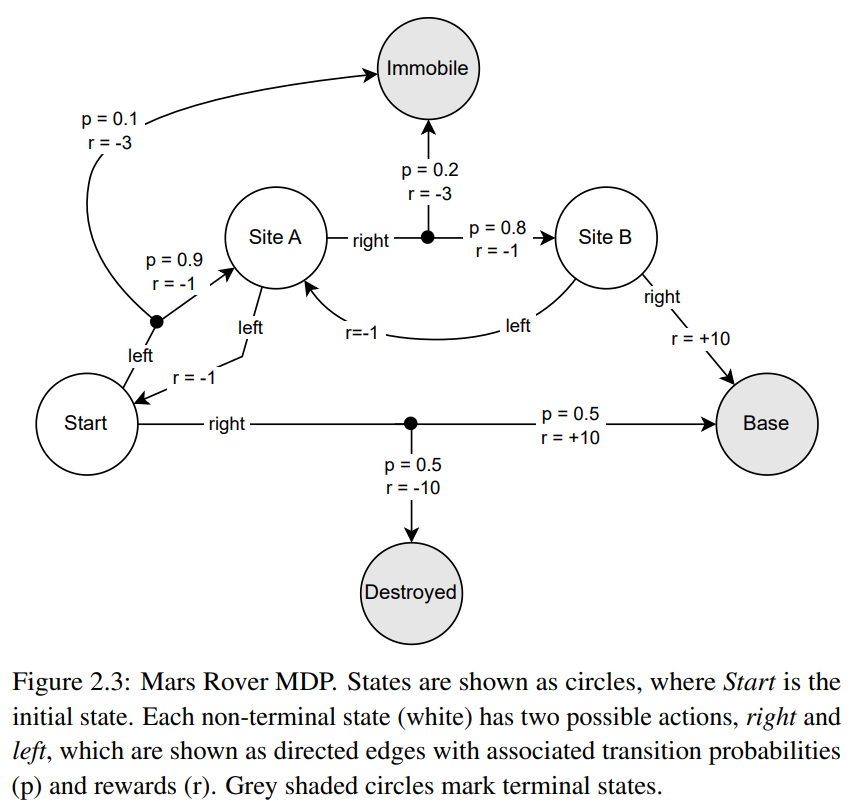

In [44]:
import numpy as np
import gymnasium as gym
from gymnasium import spaces


class MarsRover(gym.Env):
    STATES = {
        0: "Start",
        1: "Site A",
        2: "Site B",
        3: "Base",
        4: "Immobile",
        5: "Destroyed",
    }

    def __init__(self):
        super().__init__()
        self.observation_space = spaces.Discrete(6)
        self.action_space = spaces.Discrete(2)

    def reset(self):
        super().reset()
        self.state = 0
        return self.state, {}

    def step(self, action):
        T_left = np.array(
            [
                [0.0, 0.9, 0.0, 0.0, 0.1, 0.0],
                [1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                [0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
                [0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
                [0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
                [0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
            ]
        )
        T_right = np.array(
            [
                [0.0, 0.0, 0.0, 0.5, 0.0, 0.5],
                [0.0, 0.0, 0.8, 0.0, 0.2, 0.0],
                [0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
                [0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
                [0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
                [0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
            ]
        )
        if action == 0:
            T = T_left
        elif action == 1:
            T = T_right
        else:
            raise ValueError(f"Invalid action {action}")

        rewards = np.array([-1, -1, -1, +10, -3, -10])

        probs = T[self.state]
        self.state = self.np_random.choice(self.observation_space.n, p=probs)
        reward = rewards[self.state]
        done = self.state in [3, 4, 5]

        return self.state, reward, done, False, {}

In [48]:
env = MarsRover()
env.reset()
done = False

while not done:
    action = env.action_space.sample()
    obs, reward, done, *_ = env.step(action)
    action_str = "left" if not action else "right"
    print(f"Action: {action_str}; State: {env.STATES[obs]}")

Action: left; State: Site A
Action: right; State: Site B
Action: left; State: Site A
Action: right; State: Site B
Action: left; State: Site A
Action: right; State: Site B
Action: left; State: Site A
Action: right; State: Site B
Action: right; State: Base
